In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
df = pd.read_excel('IGE-org.xls')

In [3]:
df.sort_values(by='Date',inplace=True)

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2001-11-26,91.01,91.01,91.01,91.01,0,42.09
1,2001-11-27,91.01,91.01,91.01,91.01,0,42.09
2,2001-11-28,91.01,91.01,91.01,91.01,0,42.09
3,2001-11-29,91.01,91.01,91.01,91.01,0,42.09
4,2001-11-30,91.32,91.32,91.32,91.32,200,42.23


In [5]:
dailyret = df.loc[:,'Adj Close'].pct_change()

In [6]:
dailyret

0            NaN
1       0.000000
2       0.000000
3       0.000000
4       0.003326
          ...   
1499    0.006491
1500   -0.017546
1501   -0.046863
1502    0.019379
1503    0.002671
Name: Adj Close, Length: 1504, dtype: float64

In [7]:
excessRet = dailyret - 0.04/252

In [8]:
excessRet

0            NaN
1      -0.000159
2      -0.000159
3      -0.000159
4       0.003167
          ...   
1499    0.006332
1500   -0.017705
1501   -0.047022
1502    0.019220
1503    0.002512
Name: Adj Close, Length: 1504, dtype: float64

In [9]:
sharpeRatio = np.sqrt(252)*np.mean(excessRet) / np.std(excessRet)

In [10]:
sharpeRatio

0.789580250130583

### LOng Market Neutral

In [11]:
df2 = pd.read_excel("SPY.xls")

In [12]:
df2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2001-11-26,115.75,116.34,115.07,115.93,13726000,105.52
1,2001-11-27,115.62,116.90,114.09,115.43,19261400,105.06
2,2001-11-28,114.74,115.17,113.25,113.34,20195500,103.16
3,2001-11-29,113.66,114.92,113.00,114.87,16354700,104.55
4,2001-11-30,114.40,114.91,114.02,114.05,13680300,103.81


In [13]:
df=pd.merge(df, df2, on='Date', suffixes=('_IGE', '_SPY'))

In [14]:
df.head()

,Date,Open_IGE,High_IGE,Low_IGE,Close_IGE,Volume_IGE,Adj Close_IGE,Open_SPY,High_SPY,Low_SPY,Close_SPY,Volume_SPY,Adj Close_SPY
0,2001-11-26,91.01,91.01,91.01,91.01,0,42.09,115.75,116.34,115.07,115.93,13726000,105.52
1,2001-11-27,91.01,91.01,91.01,91.01,0,42.09,115.62,116.90,114.09,115.43,19261400,105.06
2,2001-11-28,91.01,91.01,91.01,91.01,0,42.09,114.74,115.17,113.25,113.34,20195500,103.16
3,2001-11-29,91.01,91.01,91.01,91.01,0,42.09,113.66,114.92,113.00,114.87,16354700,104.55
4,2001-11-30,91.32,91.32,91.32,91.32,200,42.23,114.40,114.91,114.02,114.05,13680300,103.81


In [19]:
df.set_index('Date', inplace=True)

In [20]:
dailyret=df[['Adj Close_IGE', 'Adj Close_SPY']].pct_change()

In [21]:
dailyret.rename(columns={"Adj Close_IGE": "IGE", "Adj Close_SPY": "SPY"}, inplace=True)

In [22]:
dailyret

,IGE,SPY
Date,,
2001-11-26,NaN,NaN
2001-11-27,0.000000,-0.004359
2001-11-28,0.000000,-0.018085
2001-11-29,0.000000,0.013474
2001-11-30,0.003326,-0.007078
...,...,...
2007-11-08,0.006491,-0.005071
2007-11-09,-0.017546,-0.013727
2007-11-12,-0.046863,-0.009921


In [23]:
netRet=(dailyret['IGE']-dailyret['SPY'])/2

In [24]:
netRet

Date
2001-11-26         NaN
2001-11-27    0.002180
2001-11-28    0.009042
2001-11-29   -0.006737
2001-11-30    0.005202
                ...   
2007-11-08    0.005781
2007-11-09   -0.001910
2007-11-12   -0.018471
2007-11-13   -0.005551
2007-11-14    0.002720
Length: 1504, dtype: float64

In [26]:
sharpeRatio=np.sqrt(252)*np.mean(netRet)/np.std(netRet) 
sharpeRatio

0.7839419359681374

In [29]:
def calculateMaxDD(cumret):
# ====================================================== # calculation of maximum drawdown and maximum drawdown duration based on
# cumulative COMPOUNDED returns. cumret must be a com- pounded cumulative return.
# i is the index of the day with maxDD.
# ======================================================
    highwatermark=np.zeros(cumret.shape) 
    drawdown=np.zeros(cumret.shape) 
    drawdownduration=np.zeros(cumret.shape) 
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=(1+cumret[t])/(1+highwatermark[t])-1 
        if drawdown[t]==0:
            drawdownduration[t]=0 
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD, i=np.min(drawdown), np.argmin(drawdown)
    maxDDD=np.max(drawdownduration)
    return maxDD, maxDDD, i

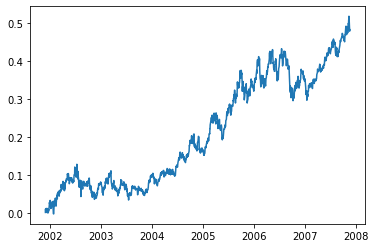

In [30]:
cumret=np.cumprod(1+netRet)-1
plt.plot(cumret)

In [31]:
maxDrawdown, maxDrawdownDuration, startDrawdownDay=calculateMaxDD(cumret.values)

In [32]:
maxDrawdown

-0.09529268047208683

In [33]:
maxDrawdownDuration

497.0

In [34]:
startDrawdownDay

1223

### Example 3.6

In [39]:
# GLD versus GDX is a good candidate for pair trading because GLD reflects the spot price of gold, 
# and GDX is a basket of gold-mining stocks.
#  the spread formed by long GLD and short GDX is mean reverting
# determine the hedge ratio between GLD and GDX
# define entry and exit thresholds for a pair-trading strategy.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
df1=pd.read_excel('GLD.xls') 
df2=pd.read_excel('GDX.xls')

In [43]:
df=pd.merge(df1, df2, on='Date', suffixes=('_GLD', '_GDX'))

In [44]:
df.head()

,Date,Open_GLD,High_GLD,Low_GLD,Close_GLD,Volume_GLD,Adj Close_GLD,Open_GDX,High_GDX,Low_GDX,Close_GDX,Volume_GDX,Adj Close_GDX
0,2007-11-30,78.35,78.60,76.98,77.32,9509100,77.32,47.09,47.50,45.70,46.36,2006000,46.36
1,2007-11-29,79.28,79.33,78.28,78.28,9306700,78.28,47.10,48.00,46.76,47.02,1668500,47.02
2,2007-11-28,79.42,79.87,78.76,79.57,9706700,79.57,46.11,48.00,46.06,47.86,3893200,47.86
3,2007-11-27,80.70,80.89,79.81,80.10,7229900,80.10,46.84,46.84,45.74,46.61,2329700,46.61
4,2007-11-26,82.25,82.25,81.13,81.30,7440200,81.30,49.43,49.43,46.85,47.06,1966500,47.06


In [45]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [46]:
trainset=np.arange(0, 252)

In [49]:
testset=np.arange(trainset.shape[0], df.shape[0])

In [52]:
# Determine hedge ratio on trainset
model=sm.OLS(df.loc[:, 'Adj Close_GLD'].iloc[trainset], df.loc[:, 'Adj Close_GDX'].iloc[trainset])

In [57]:
results=model.fit()

In [60]:
hedgeRatio = results.params

In [66]:
hedgeRatio

Adj Close_GDX    1.631009
dtype: float64

In [62]:
spread=df.loc[:, 'Adj Close_GLD']-hedgeRatio[0]*df.loc[:, 'Adj Close_GDX']

In [63]:
spread

Date
2006-05-23    4.646311
2006-05-24    4.674964
2006-05-25    2.379148
2006-05-26    2.404016
2006-05-30    3.033799
                ...   
2007-11-26    4.544719
2007-11-27    4.078673
2007-11-28    1.509911
2007-11-29    1.589959
2007-11-30    1.706425
Length: 385, dtype: float64

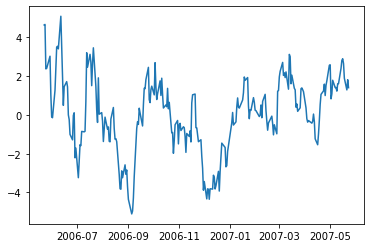

In [67]:
plt.plot(spread.iloc[trainset])

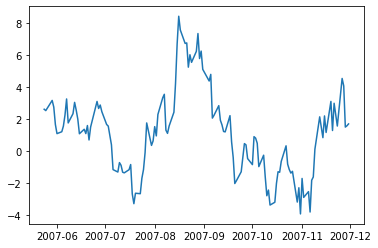

In [68]:
plt.plot(spread.iloc[testset])

In [71]:
spreadMean=np.mean(spread.iloc[trainset])
spreadStd=np.std(spread.iloc[trainset])
df['zscore']=(spread-spreadMean)/spreadStd 
df['positions_GLD_Long']=0
df['positions_GDX_Long']=0
df['positions_GLD_Short']=0
df['positions_GDX_Short']=0

In [72]:
df.head()

,Open_GLD,High_GLD,Low_GLD,Close_GLD,Volume_GLD,Adj Close_GLD,Open_GDX,High_GDX,Low_GDX,Close_GDX,Volume_GDX,Adj Close_GDX,zscore,positions_GLD_Long,positions_GDX_Long,positions_GLD_Short,positions_GDX_Short
Date,,,,,,,,,,,,,,,,,
2006-05-23,65.99,67.16,65.91,66.38,10509700,66.38,37.75,39.22,37.75,37.96,620900,37.85,2.362182,0,0,0,0
2006-05-24,64.83,65.16,63.22,64.06,11065600,64.06,37.13,37.57,35.87,36.52,638600,36.41,2.376914,0,0,0,0
2006-05-25,64.12,64.76,63.76,64.70,6505400,64.70,37.18,38.32,36.98,38.32,367000,38.21,1.196462,0,0,0,0
2006-05-26,65.01,65.10,63.75,65.10,5265900,65.10,38.74,38.74,37.77,38.55,269400,38.44,1.209248,0,0,0,0
2006-05-30,65.20,66.24,65.00,65.11,8240200,65.11,39.50,39.72,38.11,38.17,559100,38.06,1.533068,0,0,0,0


In [73]:
df.loc[df.zscore>=2, ('positions_GLD_Short', 'positions_GDX_Short')]=[-1, 1] # Short spread 

In [75]:
df.loc[df.zscore<=-2, ('positions_GLD_Long', 'positions_GDX_Long')]=[1, -1] # Buy spread

In [78]:
df.loc[df.zscore<=1, ('positions_GLD_Short', 'positions_GDX_Short')]=0 # Exit short spread
df.loc[df.zscore>=-1, ('positions_GLD_Long', 'positions_ GDX_Long')]=0 # Exit long spread

In [79]:
df.fillna(method='ffill', inplace=True) # ensure exist- ing positions are carried forward unless there is an exit signal

### simple mean-reverting model

In [81]:
# Buy the stocks with the worst previous one-day returns, and short the ones with the best previous one-day returns

### Testing the Cointegration versus Correlation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint 
from statsmodels.api import OLS
from scipy.stats import pearsonr 

In [2]:
df1=pd.read_excel('KO.xls')
df2=pd.read_excel('PEP.xls')

In [3]:
df1.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-01-18,62.34,62.45,60.16,60.74,16879100,60.74
1,2008-01-17,63.25,63.31,61.90,62.04,18636500,62.04
2,2008-01-16,63.28,63.85,62.48,62.65,12667000,62.65
3,2008-01-15,63.63,64.20,63.56,63.61,11499700,63.61
4,2008-01-14,63.75,64.52,63.75,64.30,11465700,64.30


In [4]:
df=pd.merge(df1, df2, on='Date', suffixes=('_KO', '_PEP'))

In [5]:
df.head()

,Date,Open_KO,High_KO,Low_KO,Close_KO,Volume_KO,Adj Close_KO,Open_PEP,High_PEP,Low_PEP,Close_PEP,Volume_PEP,Adj Close_PEP
0,2008-01-18,62.34,62.45,60.16,60.74,16879100,60.74,72.54,73.16,70.95,71.46,8986000,71.46
1,2008-01-17,63.25,63.31,61.90,62.04,18636500,62.04,73.70,73.70,71.84,72.10,10016800,72.10
2,2008-01-16,63.28,63.85,62.48,62.65,12667000,62.65,74.35,74.85,73.28,73.54,9636900,73.54
3,2008-01-15,63.63,64.20,63.56,63.61,11499700,63.61,76.02,76.55,74.71,74.83,9342100,74.83
4,2008-01-14,63.75,64.52,63.75,64.30,11465700,64.30,78.25,78.39,76.65,76.92,7762500,76.92


In [6]:
df.set_index('Date', inplace=True) 
df.sort_index(inplace=True)

In [7]:
df.head()

,Open_KO,High_KO,Low_KO,Close_KO,Volume_KO,Adj Close_KO,Open_PEP,High_PEP,Low_PEP,Close_PEP,Volume_PEP,Adj Close_PEP
Date,,,,,,,,,,,,
1977-01-03,79.00,79.00,78.12,78.50,1305600,0.68,79.00,80.13,79.00,80.00,1085400,0.66
1977-01-04,78.37,78.37,77.00,77.62,1440000,0.67,80.00,80.25,78.88,79.00,3018600,0.65
1977-01-05,77.62,77.75,76.37,76.37,2001600,0.66,78.75,78.75,77.88,78.38,2246400,0.65
1977-01-06,76.37,77.50,76.37,77.50,1555200,0.67,78.63,79.00,78.63,78.75,1004400,0.65
1977-01-07,77.50,77.50,76.50,77.00,1694400,0.67,78.75,78.75,78.25,78.50,950400,0.65


In [8]:
coint_t, pvalue, crit_value=coint(df['Adj Close_KO'],df['Adj Close_PEP'])

In [9]:
(coint_t, pvalue, crit_value)

(-1.581551704151716,
 0.7286134576473535,
 array([-3.89783854, -3.33691006, -3.04499143]))

In [10]:
# pvalue says probability of null hypothesis (of no cointegration) is 73%

In [11]:
dailyret=df.loc[:, ('Adj Close_KO', 'Adj Close_PEP')].pct_change()

In [12]:
dailyret

,Adj Close_KO,Adj Close_PEP
Date,,
1977-01-03,NaN,NaN
1977-01-04,-0.014706,-0.015152
1977-01-05,-0.014925,0.000000
1977-01-06,0.015152,0.000000
1977-01-07,0.000000,0.000000
...,...,...
2008-01-14,0.008311,-0.011057
2008-01-15,-0.010731,-0.027171
2008-01-16,-0.015092,-0.017239


In [13]:
dailyret.corr()

,Adj Close_KO,Adj Close_PEP
Adj Close_KO,1.000000,0.484924
Adj Close_PEP,0.484924,1.000000


In [15]:
dailyret_clean=dailyret.dropna()
pearsonr(dailyret_clean.iloc[:,0], dailyret_clean.iloc[:,1]) 

(0.4849239439370571, 0.0)

## Calculation of the Half-Life of a Mean-Reverting Time Series

In [16]:
df1=pd.read_excel('GLD.xls')
df2=pd.read_excel('GDX.xls')
df=pd.merge(df1, df2, on='Date', suffixes=('_GLD', '_GDX'))

In [17]:
df.set_index('Date', inplace=True) 
df.sort_index(inplace=True)

coint_t, pvalue, crit_value=coint(df['Adj Close_GLD'],df['Adj Close_GDX'])
(coint_t, pvalue, crit_value) 

(-3.6981160763300567,
 0.01842783540953755,
 array([-3.92518794, -3.35208799, -3.05551324]))

In [5]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
import numpy as np
import pandas as pd

In [8]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(ticker + '.csv', index_col='Date', 
                         parse_dates=True)
    except FileNotFoundError:
        pass
        # print("File Doesn't Exist")
    else:
        return df

In [9]:
a_df = get_df_from_csv("GOOG") 

In [10]:
a_df.head()

,Unnamed: 0,Adj Close,daily_return
Date,,,
2017-01-03,0,786.140015,NaN
2017-01-04,1,786.900024,0.000967
2017-01-05,2,794.020020,0.009048
2017-01-06,3,806.150024,0.015277
2017-01-09,4,806.650024,0.000620


In [11]:
a_df = a_df.asfreq('d') 

In [12]:
a_df.head()

,Unnamed: 0,Adj Close,daily_return
Date,,,
2017-01-03,0.0,786.140015,NaN
2017-01-04,1.0,786.900024,0.000967
2017-01-05,2.0,794.020020,0.009048
2017-01-06,3.0,806.150024,0.015277
2017-01-07,NaN,NaN,NaN


In [13]:
a_df.index # Check frequency
a_df = a_df.fillna(method='ffill')

In [14]:
a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed',case = False)],
          axis = 1, inplace = True)

# Delete daily return column
a_df = a_df.drop(['daily_return'], axis=1)

a_df

,Adj Close
Date,
2017-01-03,786.140015
2017-01-04,786.900024
2017-01-05,794.020020
2017-01-06,806.150024
2017-01-07,806.150024
...,...
2021-08-15,2768.120117
2021-08-16,2778.320068
2021-08-17,2746.010010


In [18]:
#Statsmodels is a great library we can use to run regressions.
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt 

In [16]:
sns.set_style('darkgrid')
# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(19, 13))

In [20]:
lags = ar_select_order(a_df, maxlag=30)

/Users/taikhanghao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/Users/taikhanghao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [39]:
lags

In [21]:
model = AutoReg(a_df['Adj Close'], lags.ar_lags)
model_fit = model.fit()

/Users/taikhanghao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [22]:
len(a_df)

1690

In [23]:
train_df = a_df.iloc[50:1352] 
test_df = a_df.iloc[1352:]

In [24]:
train_model = AutoReg(a_df['Adj Close'], 500).fit(cov_type="HC0")


/Users/taikhanghao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [25]:
start = len(train_df)
end = len(train_df) + len(test_df) - 1

In [27]:
prediction = train_model.predict(start=start, end=end, dynamic=True)

In [28]:
ax = test_df.plot(ax=ax) # Orange
ax = prediction.plot(ax=ax) 

In [29]:
forecast = train_model.predict(start=end, end=end+100, dynamic=True)
ax = forecast.plot(ax=ax) 

/Users/taikhanghao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/Users/taikhanghao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/Users/taikhanghao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/Users/taikhanghao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old

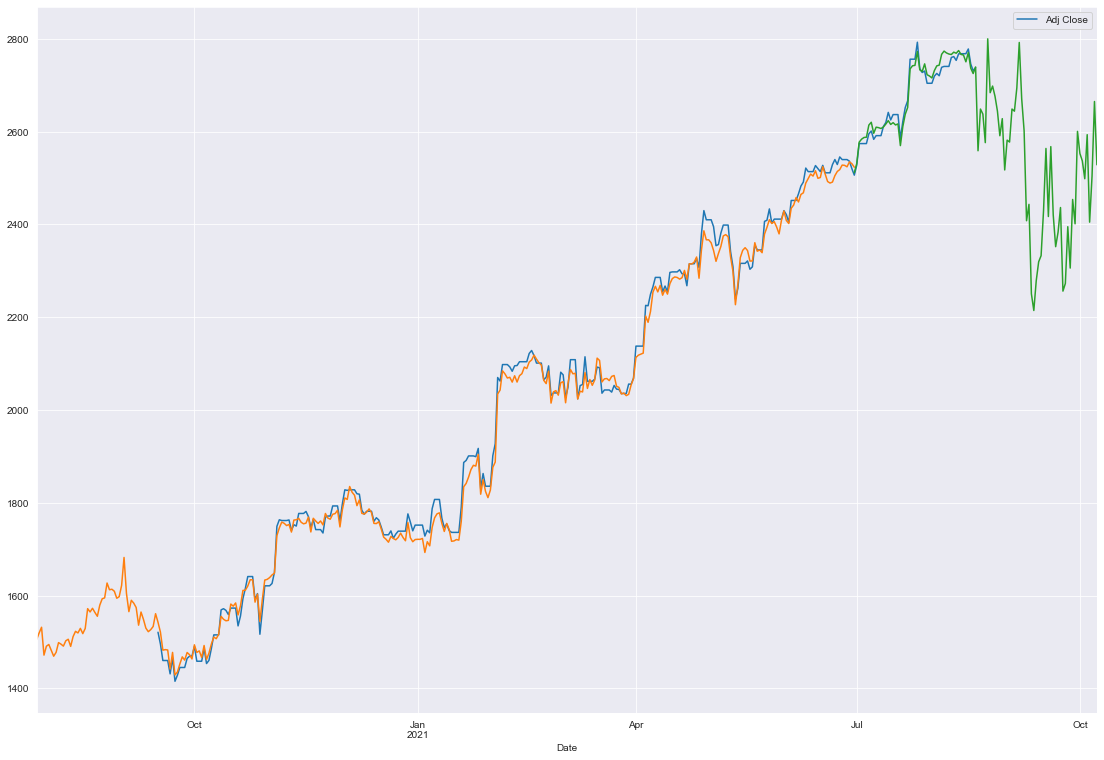

In [33]:
a_df = get_df_from_csv("GOOG") 

a_df = a_df.asfreq('d') # Change frequency to day
a_df.index # Check frequency
a_df = a_df.fillna(method='ffill') # Fill missing values

# Delete unnamed column
a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed',case = False)],
          axis = 1, inplace = True)

# Delete daily return column
a_df = a_df.drop(['daily_return'], axis=1)

a_df

# Set style for seaborn plot
sns.set_style('darkgrid')
# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(19, 13))

# Set fig and ax
fig, ax = plt.subplots()
# ax = a_df.plot(ax=ax)

# Figure out optimum lags which will be 1 or 2 for this data set
lags = ar_select_order(a_df, maxlag=30)

# Create our model using whole data set
model = AutoReg(a_df['Adj Close'], lags.ar_lags)
model_fit = model.fit()

# Define training and testing area
len(a_df) # 1166 observations
train_df = a_df.iloc[50:1352] # 80% minus 1st 50
test_df = a_df.iloc[1352:] # Last 20%

# Define training model for 500 days (Play with Number & Test)
# and White's covariance estimator
train_model = AutoReg(a_df['Adj Close'], 800).fit(cov_type="HC0")

# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end, dynamic=True)

# Plot testing data with prediction
ax = test_df.plot(ax=ax) # Orange
ax = prediction.plot(ax=ax) # Green

# Predict 100 days into the future
forecast = train_model.predict(start=end, end=end+100, dynamic=True)
ax = forecast.plot(ax=ax)

In [34]:
import yfinance as yf

In [53]:
closePrice = yf.download("GOOG", start='2017-01-03',end='2021-08-19')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [54]:
closePrice

Date
2017-01-03     786.140015
2017-01-04     786.900024
2017-01-05     794.020020
2017-01-06     806.150024
2017-01-09     806.650024
                 ...     
2021-08-12    2767.790039
2021-08-13    2768.120117
2021-08-16    2778.320068
2021-08-17    2746.010010
2021-08-18    2731.399902
Name: Adj Close, Length: 1165, dtype: float64

/Users/taikhanghao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/taikhanghao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
/Users/taikhanghao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/taikhanghao/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The param

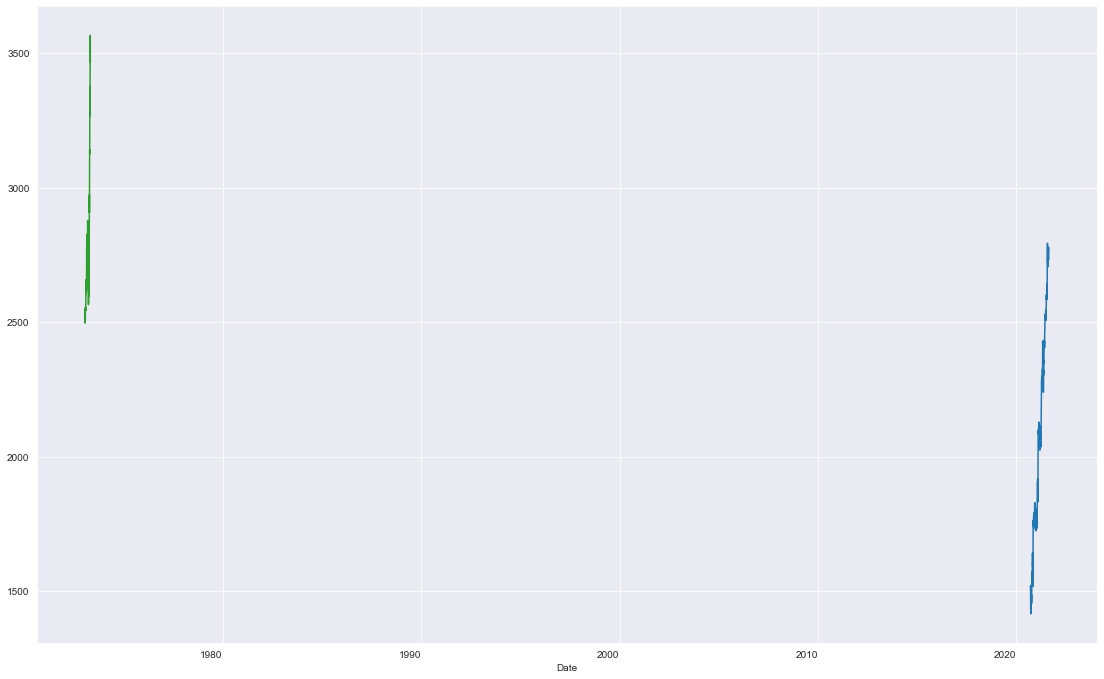

In [57]:
# Set style for seaborn plot
sns.set_style('darkgrid')
# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(19, 13))

# Set fig and ax
fig, ax = plt.subplots()
# ax = a_df.plot(ax=ax)

# Figure out optimum lags which will be 1 or 2 for this data set
lags = ar_select_order(closePrice, maxlag=30)

# Create our model using whole data set
model = AutoReg(closePrice, lags.ar_lags)
model_fit = model.fit()

# Define training and testing area
len(closePrice) # 1165 observations
train_df = closePrice.iloc[50:932] # 80% minus 1st 50
test_df = closePrice.iloc[932:] # Last 20%

# Define training model for 500 days (Play with Number & Test)
# and White's covariance estimator
train_model = AutoReg(closePrice, 500).fit(cov_type="HC0")

# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1

prediction = train_model.predict(start=start, end=end, dynamic=True)

# Plot testing data with prediction
ax = test_df.plot(ax=ax) # Orange
ax = prediction.plot(ax=ax) # Green

# Predict 100 days into the future
forecast = train_model.predict(start=end, end=end+100, dynamic=True)
ax = forecast.plot(ax=ax)

# Python for Finance - Eryk Lewinson 

## Page 49

In [1]:
from datetime import datetime
import backtrader as bt

In [2]:
pip install backtrader

     |████████████████████████████████| 410 kB 5.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
from datetime import datetime
import backtrader as bt

# Create a subclass of Strategy to define the indicators and logic

class SmaCross(bt.Strategy):
    # list of parameters which are configurable for the strategy
    params = dict(
        pfast=10,  # period for the fast moving average
        pslow=30   # period for the slow moving average
    )

    def __init__(self):
        sma1 = bt.ind.SMA(period=self.p.pfast)  # fast moving average
        sma2 = bt.ind.SMA(period=self.p.pslow)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position


cerebro = bt.Cerebro()  # create a "Cerebro" engine instance

# Create a data feed
data = bt.feeds.YahooFinanceCSVData(dataname='AAPL.csv')

cerebro.adddata(data)  # Add the data feed

cerebro.addstrategy(SmaCross)  # Add the trading strategy
cerebro.run()  # run it all
cerebro.plot()  # and plot it with a single command

ImportError: cannot import name 'warnings' from 'matplotlib.dates' (/Users/taikhanghao/opt/anaconda3/lib/python3.8/site-packages/matplotlib/dates.py)

In [6]:
pip install matplotlib==3.2.2

     |████████████████████████████████| 12.5 MB 5.8 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
RISKY_ASSET = 'MSFT' 
START_DATE = '2019-01-01' 
END_DATE = '2019-07-31'

In [3]:
df = yf.download(RISKY_ASSET, start=START_DATE, end=END_DATE, adjusted=True)

[*********************100%***********************]  1 of 1 completed


Average return: 0.24%


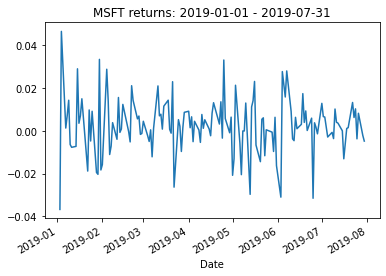

In [4]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()
print(f'Average return: {100 * returns.mean():.2f}%') 
returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}')


In [5]:
train = returns['2019-01-01':'2019-06-30'] 
test = returns['2019-07-01':'2019-07-31']

In [9]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, antithetic_var=False):
    dt = T/N
    if antithetic_var:
        dW_ant = np.random.normal(scale = np.sqrt(dt),size=(int(n_sims/2), N + 1)) 
        dW = np.concatenate((dW_ant, -dW_ant), axis=0)
    else:
        dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N + 1))
    S_t = s_0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) * dt + sigma * dW, axis=1))
    S_t[:, 0] = s_0 
    return S_t

In [10]:
import numpy as np
from scipy.stats import norm

In [12]:
S_0 = 100
K = 100
r = 0.05
sigma = 0.50
T = 1 # 1 year
N = 252 # 252 days in a year
dt = T / N # time step
n_sims = 10 ** 6 
discount_factor = np.exp(-r * T)

In [14]:
def black_scholes_analytical(S_0, K, T, r, sigma, type='call'): 
    d1 = (np.log(S_0/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T)) 
    d2 = (np.log(S_0/K) + (r - 0.5 * sigma**2) * T) /(sigma * np.sqrt(T))
    if type == 'call':
        val = (S_0*norm.cdf(d1, 0, 1)-K*np.exp(-r*T)*norm.cdf(d2, 0, 1)) 
    elif type == 'put':
        val = (K*np.exp(-r*T)*norm.cdf(-d2, 0, 1)-S_0 *norm.cdf(-d1, 0, 1))
    return val

In [15]:
black_scholes_analytical(S_0=S_0, K=K, T=T, r=r, sigma=sigma, type='call')

21.79260421286685

In [25]:
N_SIMS=100000

In [26]:
gbm_sims = simulate_gbm(s_0=S_0, mu=r, sigma=sigma, n_sims=N_SIMS, T=T, N=N)

In [27]:
premium = discount_factor * np.average(np.maximum(0, gbm_sims[:, -1] - K))

In [28]:
premium

22.184659835900842

## Estimating value-at-risk using Monte Carlo

In [1]:
# Value-at-risk(VaR) measures the risk associate with a position
# VaR reports the worst expected loss at a given level of confidence
# For example, 1-day 95% VaR of our portfolio is $1000. This means 95% 
# of the time, we will not lose more than $1000 by holding our portfolio over one day

In [2]:
# There are many ways to calculate VaR, but we will use Monte Carlo simulations

In [1]:

            import numpy as np
            import pandas as pd
            import yfinance as yf
            import seaborn as sns

In [2]:
RISKY_ASSETS = ['GOOG', 'FB'] 
SHARES = [5, 5] # Number of shares for each stock 
START_DATE = '2018-01-01' 
END_DATE = '2018-12-31'
T= 1 # Day in the future 
N_SIMS = 10 ** 5 # Number of simulations 

In [3]:
df = yf.download(RISKY_ASSETS, start=START_DATE, end=END_DATE, adjusted=True)

[*********************100%***********************]  2 of 2 completed


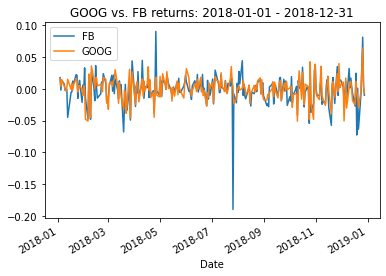

In [4]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()
plot_title = f'{" vs. ".join(RISKY_ASSETS)} returns: {START_DATE} - {END_DATE}'
returns.plot(title=plot_title)



In [9]:
# The correlation between the two series is
adj_close.corr().iloc[0,1]

0.5255627330301897

In [ ]:
# For calculating VaR, we need to account for our assets may be correlated 

In [11]:
cov_mat = returns.cov()

In [12]:
# Perform the Cholesky decomposition of the covariance matrix:
chol_mat = np.linalg.cholesky(cov_mat)

In [15]:
# Draw the correlated random numbers from the Standard Normal distribution
rv = np.random.normal(size=(N_SIMS, len(RISKY_ASSETS))) # Create a random normal of sample size 10**5 x 2 
correlated_rv = np.transpose(np.matmul(chol_mat, np.transpose(rv))) # added correlation to the generated random variables.

In [19]:
# Define the metrics that will be used for simulations:
r = np.mean(returns, axis=0).values # Mean return
sigma = np.std(returns, axis=0).values # Standard deviation 
S_0 = adj_close.values[-1, :] # Last stock prices 
P_0 = np.sum(SHARES * S_0) # Initial portfolio value

In [25]:
# Calculate the terminal price of the considered stocks:
S_T = S_0 * np.exp((r - 0.5 * sigma ** 2) * T +sigma * np.sqrt(T) * correlated_rv)

In [26]:
S_T

array([[133.1497686 ,  51.86295936],
       [133.10697376,  51.85682628],
       [132.90809312,  51.83334654],
       ...,
       [133.07307594,  51.83617407],
       [133.1112425 ,  51.87250955],
       [133.12284123,  51.838806  ]])

In [27]:
# Calculate the terminal portfolio value and the portfolio returns:
P_T = np.sum(SHARES * S_T, axis=1) 
P_diff = P_T - P_0

In [43]:
P_diff

array([-0.20634543, -0.45098499, -1.56278691, ..., -0.72373513,
       -0.35122493, -0.46174906])

In [46]:
list(zip(percentiles, var))

[(0.01, -2.4906937420986774),
 (0.1, -2.2193560555835803),
 (1.0, -1.8657877033485306)]

In [29]:
# Calculate the VaR for the selected confidence levels:
P_diff_sorted = np.sort(P_diff)
percentiles = [0.01, 0.1, 1.]
var = np.percentile(P_diff_sorted, percentiles)
for x, y in zip(percentiles, var):
    print(f'1-day VaR with {100-x}% confidence: {-y:.2f}$')

1-day VaR with 99.99% confidence: 2.49$
1-day VaR with 99.9% confidence: 2.22$
1-day VaR with 99.0% confidence: 1.87$


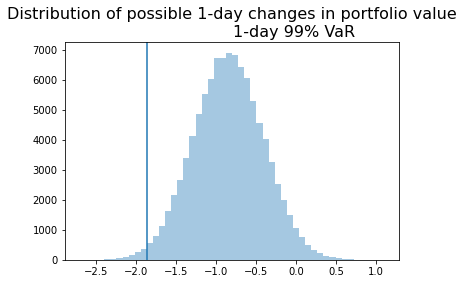

In [48]:
ax = sns.distplot(P_diff, kde=False) 
ax.set_title('''Distribution of possible 1-day changes in portfolio value
                        1-day 99% VaR''', fontsize=16) 
ax.axvline(var[2], 0, 10000);

In [ ]:
# Visualize data
# Since the unit is different, we use two axis to demonstrate the data 

fig, ax1 = plt.subplots(figsize=(10, 5))


ax2 = ax1.twinx()
ax1.plot(closePriceSP['SWN'], 'r-',label='SWN')
ax1.plot(closePriceSP['CRK'], 'g-', label = 'CRK')
ax1.plot(closePriceSP['NC'], 'y-', label = 'NC')
ax2.plot(closePriceSP['^GSPC'], 'b-', label = 'S&P')


ax1.set_xlabel('Date')
ax1.set_ylabel('Stock', color='g')
ax2.set_ylabel('Index', color='b')

ax1.legend()
ax2.legend()
plt.show()

### Williams %R

In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

In [7]:
nflx = yf.download("AAPL",start='2022-01-01',end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [8]:
nflx.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959732,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663086,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910645,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007523,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176544,86709100


In [9]:
# Loopback period 14 days

def get_wr(high, low, close, lookback):
    highh = high.rolling(lookback).max() 
    lowl = low.rolling(lookback).min()
    wr = -100 * ((highh - close) / (highh - lowl))
    return wr

nflx['wr_14'] = get_wr(nflx['High'], nflx['Low'], nflx['Adj Close'], 14)
nflx = nflx.dropna()
nflx

,Open,High,Low,Close,Adj Close,Volume,wr_14
Date,,,,,,,
2022-01-21,164.419998,166.330002,162.300003,162.410004,161.472839,122848900,-104.007576
2022-01-24,160.020004,162.300003,154.699997,161.619995,160.687393,162294600,-78.798176
2022-01-25,158.979996,162.759995,157.020004,159.779999,158.858032,115798400,-83.674774
2022-01-26,163.500000,164.389999,157.820007,159.690002,158.768539,108275300,-81.901498
2022-01-27,162.449997,163.839996,158.279999,159.220001,158.301270,121954600,-83.980101
...,...,...,...,...,...,...,...
2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000,-49.315764
2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800,-65.368411
2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111224400,-39.460603


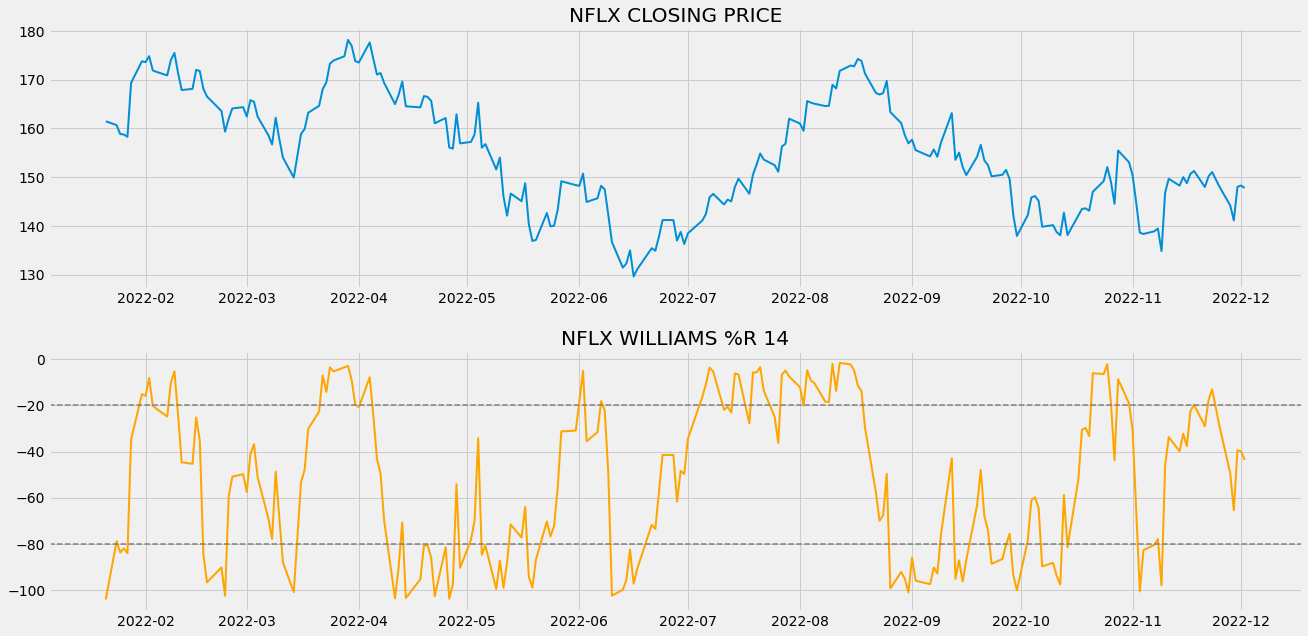

In [10]:
ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 1)
ax1.plot(nflx['Adj Close'], linewidth = 2)
ax1.set_title('NFLX CLOSING PRICE')
ax2.plot(nflx['wr_14'], color = 'orange', linewidth = 2)
ax2.axhline(-20, linewidth = 1.5, linestyle = '--', color = 'grey')
ax2.axhline(-80, linewidth = 1.5, linestyle = '--', color = 'grey')
ax2.set_title('NFLX WILLIAMS %R 14')
plt.show()

In [11]:
len(nflx['wr_14'])

219

In [14]:
def implement_wr_strategy(prices, wr):    
    buy_price = []
    sell_price = []
    wr_signal = []
    signal = 0

    for i in range(len(wr)):
        if wr[i-1] > -80 and wr[i] < -80:    # Buy when previous > -80
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                wr_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                wr_signal.append(0)
        elif wr[i-1] < -20 and wr[i] > -20:  # Sell when previous < -20
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                wr_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                wr_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            wr_signal.append(0)
            
    return buy_price, sell_price, wr_signal
            
buy_price, sell_price, wr_signal = implement_wr_strategy(nflx['Adj Close'], nflx['wr_14'])

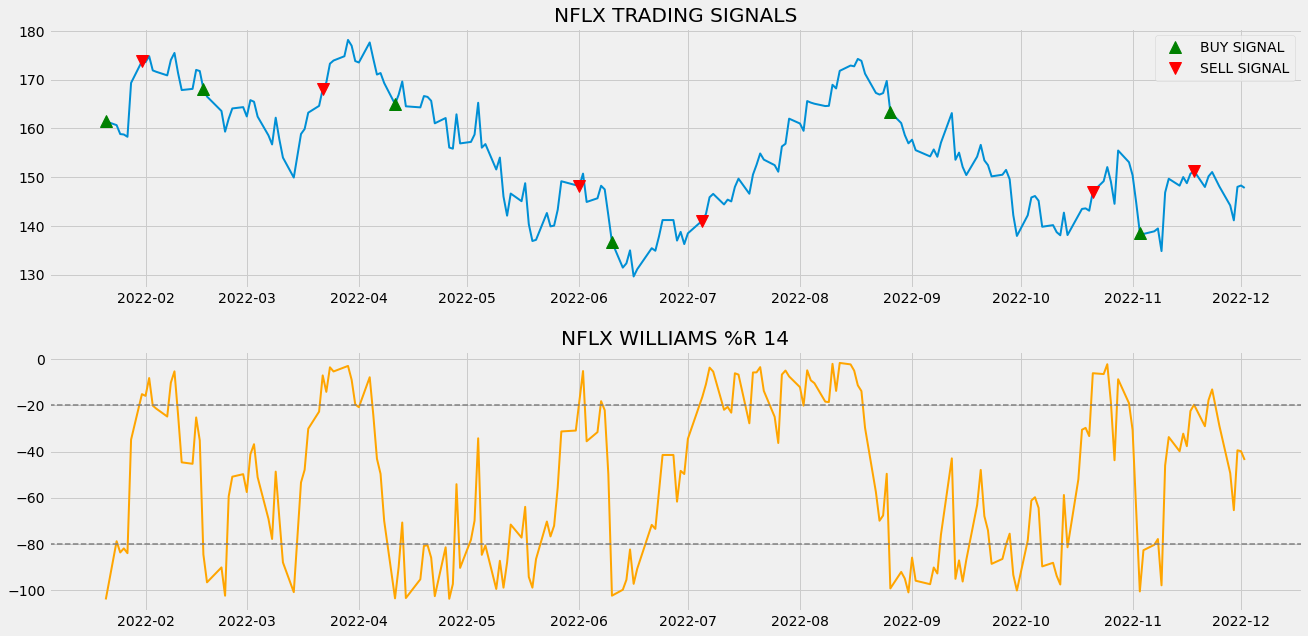

In [15]:
ax1 = plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 1)
ax1.plot(nflx['Adj Close'], linewidth = 2)
ax1.plot(nflx.index, buy_price, marker = '^', markersize = 12, linewidth = 0, color = 'green', label = 'BUY SIGNAL')
ax1.plot(nflx.index, sell_price, marker = 'v', markersize = 12, linewidth = 0, color = 'r', label = 'SELL SIGNAL')
ax1.legend()
ax1.set_title('NFLX TRADING SIGNALS')
ax2.plot(nflx['wr_14'], color = 'orange', linewidth = 2)
ax2.axhline(-20, linewidth = 1.5, linestyle = '--', color = 'grey')
ax2.axhline(-80, linewidth = 1.5, linestyle = '--', color = 'grey')
ax2.set_title('NFLX WILLIAMS %R 14')
plt.show()

In [ ]:
# If we only base our trading decision on Williams %R alone, it will not be a good investment. For example, between June and mid August, 
# although the stock was oversold, as indicated that the Williams is smaller than 20, the stock kept going up.